<a href="https://colab.research.google.com/github/opeokupe/capstone-ai-ml/blob/main/Copy_of_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Churn Rate Analysis & Data Preprocessing

## Imperial College Capstone Project


In [ ]:
!pip install nbimport
!pip install import_ipynb

  Preparing metadata (setup.py) ... done
  Created wheel for nbimport: filename=nbimport-0.0.0-py3-none-any.whl size=1843 sha256=1d0fe311981346ee6069d83c6009bbeb5950633b566fde88d724dc47083e396a
  Stored in directory: /root/.cache/pip/wheels/e2/15/17/837f7c2f7bcd2c50d43bf6fed928cc907ee4fca6da40cff330
Successfully built nbimport
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Initial Imports
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from scipy.stats import chi2_contingency, uniform, randint
import warnings
warnings.filterwarnings('ignore')
import sys
import importlib
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Functions')
import import_ipynb

#


In [ ]:

# Load the data
train_url = 'https://raw.githubusercontent.com/opeokupe/capstone-ai-ml/main/data/train.csv'
test_url = 'https://raw.githubusercontent.com/opeokupe/capstone-ai-ml/main/data/test.csv'
# train_url = 'https://raw.githubusercontent.com/opeokupe/capstone-ai-ml/main/data/train_2.csv'
# test_url = 'https://raw.githubusercontent.com/opeokupe/capstone-ai-ml/main/data/test_2.csv'
train_data = pd.read_csv(train_url, on_bad_lines='skip')
test_data = pd.read_csv(test_url, on_bad_lines='skip' )

In [ ]:
# In the notebook where you want to use the functions:
%run "/content/drive/MyDrive/Colab Notebooks/Functions.ipynb"

# 2. Initial Data Exploration
## 2.1 Basic Data Overview

In [ ]:


# def explore_data(df, title="Dataset"):
#     """
#     Performs initial exploration of the dataset
#     """
#     print(f"\n{title} Exploration:")
#     print("-" * 50)
#     print(f"Shape: {df.shape}")
#     print("\nFirst few rows:")
#     print(df.head())
#     print("\nData Info:")
#     print(df.info())
#     print("\nMissing Values:")
#     print(df.isnull().sum())
#     print("\nBasic Statistics:")
#     print(df.describe())



### Explore training data

In [ ]:
explore_data(train_data, "Training Dataset")


Training Dataset Exploration:
--------------------------------------------------
Shape: (36992, 25)

First few rows:
                            customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date  \
0     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id  .


## 2.2 Data Distribution Analysis

Analyzes and plots distributions of numerical features

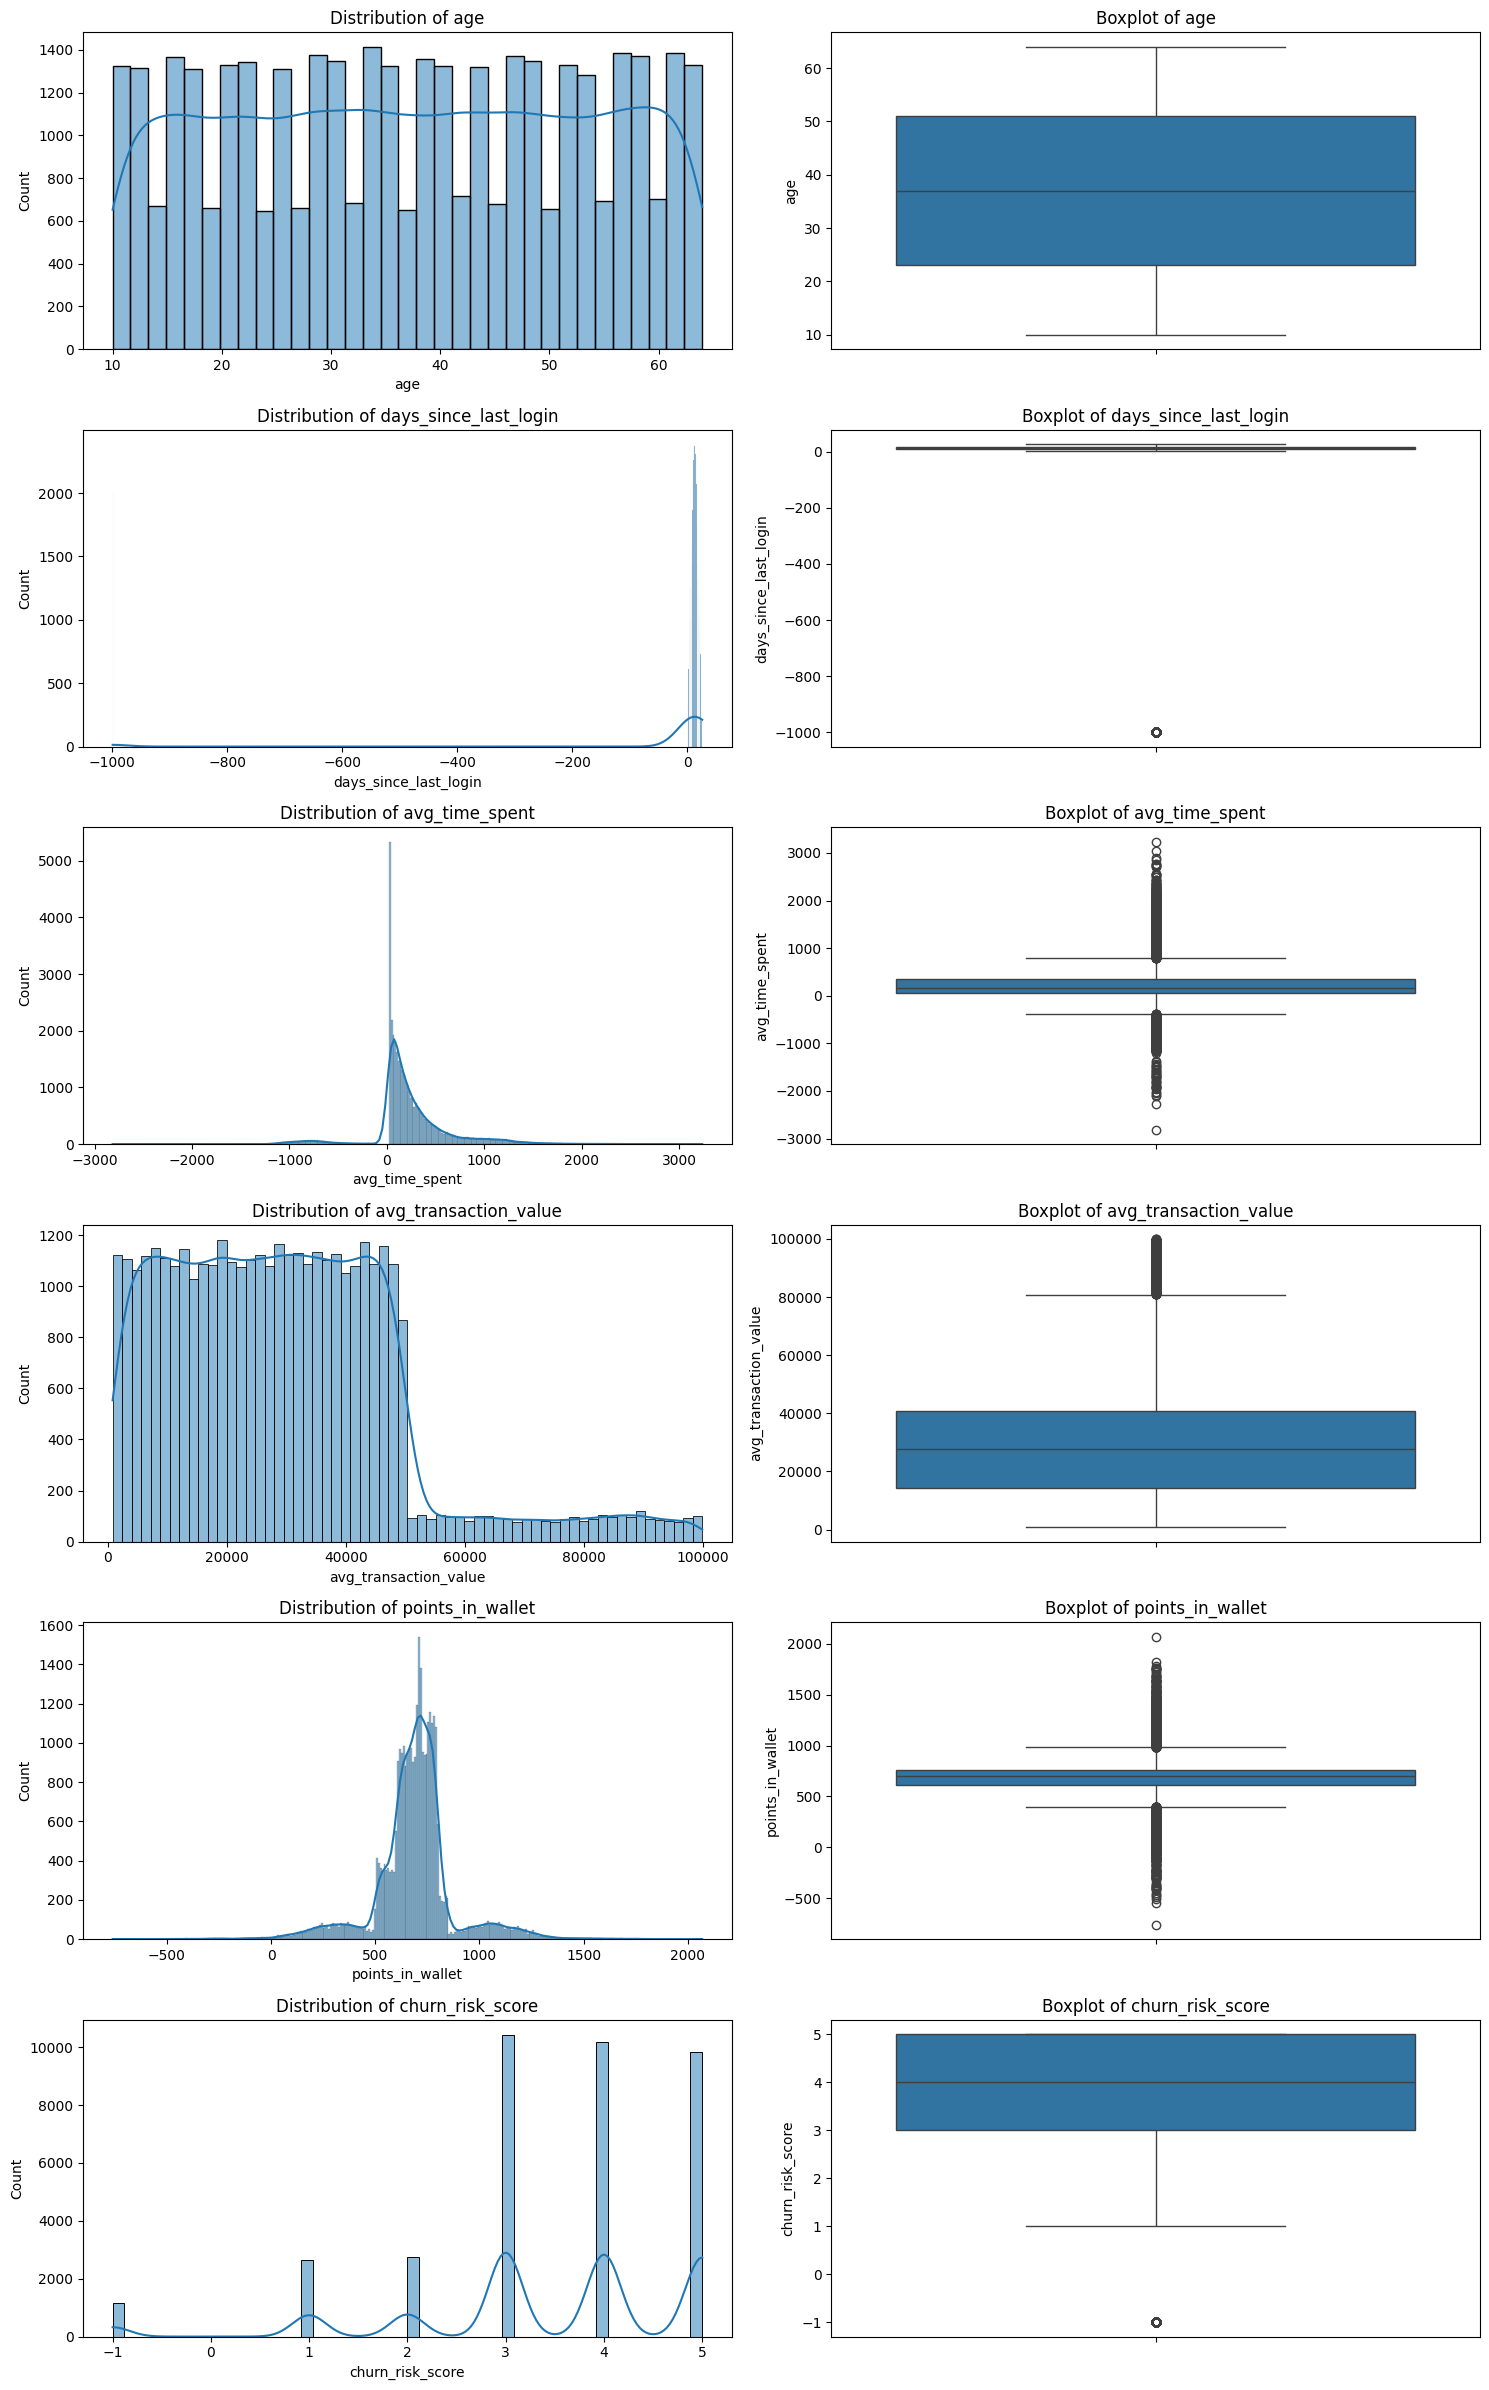

In [ ]:

# Plot distributions
analyze_distributions(train_data)

# 3. Bias Analysis

Document potential biases in the dataset:
- Selection bias: [Your analysis here]
- Measurement bias: [Your analysis here]
- Demographic representation: [Your analysis here]
- Time-related biases: [Your analysis here]


### Initial Assessment of the Dataset

Here are some key observations and potential biases:



### **1. Selection Bias**
- **Possible Issues**:
  - The column `region_category` indicates whether customers are from "Village," "City," or "Town." Missing values (`5428` out of `36992`) could mean certain regions are underrepresented, potentially skewing analysis.
  - If the dataset only includes customers with memberships (`membership_category`), non-members may be excluded, biasing insights.

- **My Potential Solution**:
  - Assess the proportion of missing `region_category` values.
  - Check if the dataset represents all desired regions evenly.



### **2. Measurement Bias**
- **Possible Issues**:
  - Columns like `days_since_last_login`, `avg_time_spent`, and `points_in_wallet` might have inaccuracies. Missing or incorrect entries (`points_in_wallet` has 3443 missing values) can distort results.
  - Self-reported columns, like `feedback`, may have subjective or inconsistent inputs.

- **My Potential Solution**:
  - Impute or drop missing values thoughtfully.
  



### **3. Demographic Representation Bias**
- **Possible Issues**:
  - `age` and `gender` could indicate skewed representation across age groups or genders. If one demographic dominates, the model may not generalize well to others.
  - Check if `region_category` and `membership_category` align with demographic diversity.

- **Solution**:
  - Analyze the distribution of `age`, `gender`, and `region_category` to ensure fair representation.

---

### **4. Time-Related Bias**
- **Possible Issues**:
  - `joining_date` and `last_visit_time` suggest temporal aspects. If data collection spans only certain time periods, conclusions may not generalize to other periods.
  - Seasonal or temporal patterns could influence customer behavior, such as average transaction values or churn risk.

- **Solution**:
  - Verify if data spans multiple years, seasons, or significant events.
  - Segment analysis by time to capture temporal variations.

---

### Next Steps
1. Analyze the distribution of key columns (`age`, `gender`, `region_category`, etc.) to detect representation bias.
2. Address missing values in columns like `region_category` and `points_in_wallet`.
3. Examine temporal coverage of the data in `joining_date` and `last_visit_time`.
4. Assess if feedback categories or churn scores exhibit potential skew.

Would you like me to dive deeper into specific columns or biases? I can also generate visualizations to provide a clearer view. Let me know!

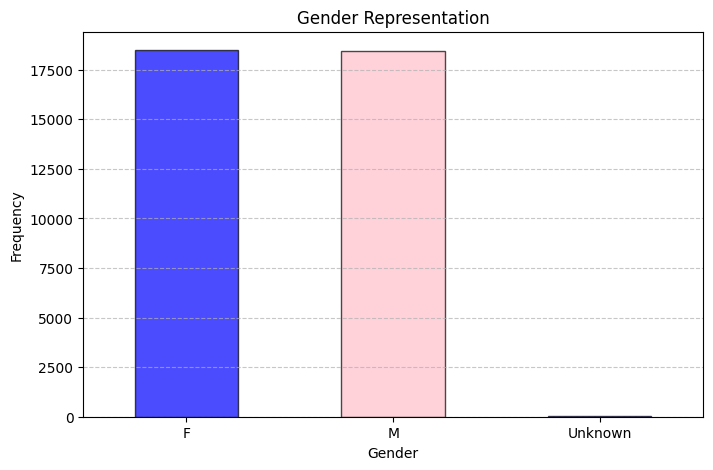

{'F': 18490, 'M': 18443, 'Unknown': 59}

In [ ]:
# check bias on age and gender

# # Check age distribution
# plt.figure(figsize=(10, 5))
# plt.hist(train_data['age'], bins=20, edgecolor='black', alpha=0.7)
# plt.title('Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

# Check gender distribution
gender_counts = train_data['gender'].value_counts()
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color=['blue', 'pink'], edgecolor='black', alpha=0.7)
plt.title('Gender Representation')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Provide numerical breakdown
# age_summary = train_data['age'].describe()
gender_summary = gender_counts.to_dict()

# age_summary,
gender_summary

In [ ]:
excluded_columns = ['customer_id','security_no', 'Name','referral_id']
# filtered_columns = [col for col in train_data if col not in excluded_columns]
# filtered_data = train_data[filtered_columns]

In [ ]:
filtered_columns_train = [col for col in train_data if col not in excluded_columns]
filtered_columns_test = [col for col in test_data if col not in excluded_columns]
filtered_data_train = train_data[filtered_columns_train]
filtered_data_test = test_data[filtered_columns_test]

In [ ]:
check_cardinality(filtered_data_train)

nunique  percent_unique
last_visit_time                 30101       81.371648
avg_frequency_login_days         1654        4.471237
joining_date                     1096        2.962803
feedback                            9        0.024330
membership_category                 6        0.016220
complaint_status                    5        0.013516
medium_of_operation                 4        0.010813
gender                              3        0.008110
region_category                     3        0.008110
joined_through_referral             3        0.008110
preferred_offer_types               3        0.008110
internet_option                     3        0.008110
used_special_discount               2        0.005407
offer_application_preference        2        0.005407
past_complaint                      2        0.005407


Chi-square test results for gender:
Chi-square statistic: 8.00
p-value: 0.6284

Chi-square test results for region_category:
Chi-square statistic: 97.49
p-value: 0.0000

Chi-square test results for membership_category:
Chi-square statistic: 31501.94
p-value: 0.0000

Chi-square test results for joining_date:
Chi-square statistic: 5483.88
p-value: 0.4637

Chi-square test results for joined_through_referral:
Chi-square statistic: 171.17
p-value: 0.0000

Chi-square test results for preferred_offer_types:
Chi-square statistic: 318.94
p-value: 0.0000

Chi-square test results for medium_of_operation:
Chi-square statistic: 94.65
p-value: 0.0000

Chi-square test results for internet_option:
Chi-square statistic: 9.25
p-value: 0.5086

Chi-square test results for last_visit_time:
Chi-square statistic: 150994.38
p-value: 0.1837

Chi-square test results for avg_frequency_login_days:
Chi-square statistic: 16390.37
p-value: 0.0000

Chi-square test results for used_special_discount:
Chi-square statis

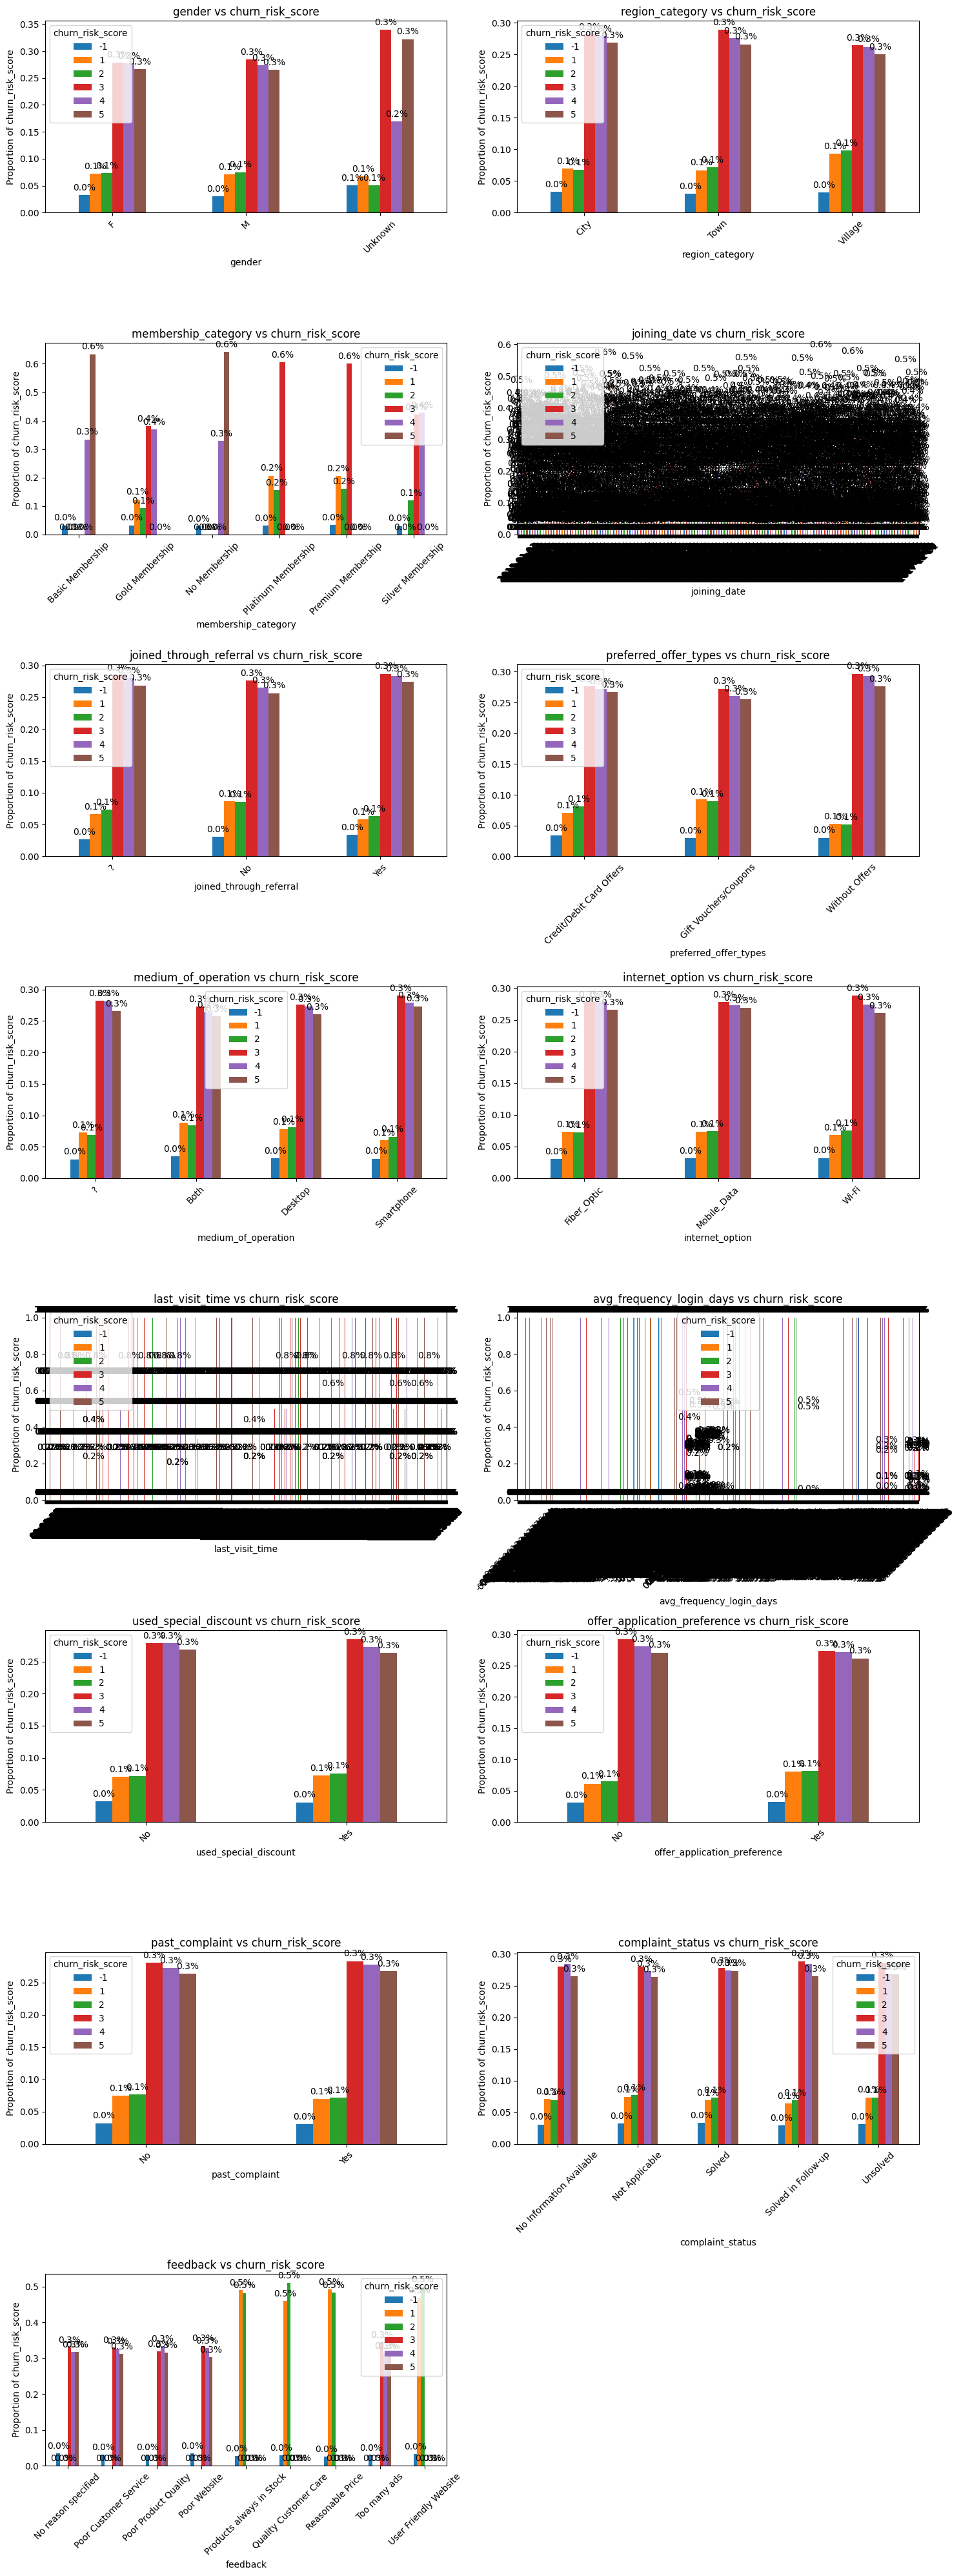


Detailed Statistics:
--------------------------------------------------

gender breakdown:
churn_risk_score   -1    1    2     3     4     5
gender                                           
F                 3.2  7.2  7.3  27.9  27.7  26.6
M                 3.0  7.1  7.5  28.4  27.4  26.5
Unknown           5.1  6.8  5.1  33.9  16.9  32.2

region_category breakdown:
churn_risk_score   -1    1    2     3     4     5
region_category                                  
City              3.3  7.0  6.8  28.2  27.8  26.9
Town              3.0  6.7  7.2  28.9  27.6  26.6
Village           3.2  9.3  9.8  26.5  26.2  25.0

membership_category breakdown:
churn_risk_score      -1     1     2     3     4     5
membership_category                                   
Basic Membership     3.2   0.0   0.0   0.0  33.4  63.3
Gold Membership      3.3  12.3   9.3  38.1  37.0   0.0
No Membership        2.9   0.0   0.0   0.0  32.9  64.1
Platinum Membership  3.1  20.7  15.6  60.6   0.0   0.0
Premium Membership

In [ ]:
analyze_categorical_relationships(filtered_data_train, 'churn_risk_score')


Summary for gender:
--------------------------------------------------
Number of unique values: 3
Most common value: F (50.0%)
Missing values: 0 (0.0%)

Value Counts:
         Count  Percentage
gender                    
F        18490   49.983780
M        18443   49.856726
Unknown     59    0.159494

Summary for region_category:
--------------------------------------------------
Number of unique values: 3
Most common value: Town (44.8%)
Missing values: 5428 (14.7%)

Value Counts:
                 Count  Percentage
region_category                   
Town             14128   44.759853
City             12737   40.352934
Village           4699   14.887213

Summary for membership_category:
--------------------------------------------------
Number of unique values: 6
Most common value: Basic Membership (20.9%)
Missing values: 0 (0.0%)

Value Counts:
                     Count  Percentage
membership_category                   
Basic Membership      7724   20.880190
No Membership         769

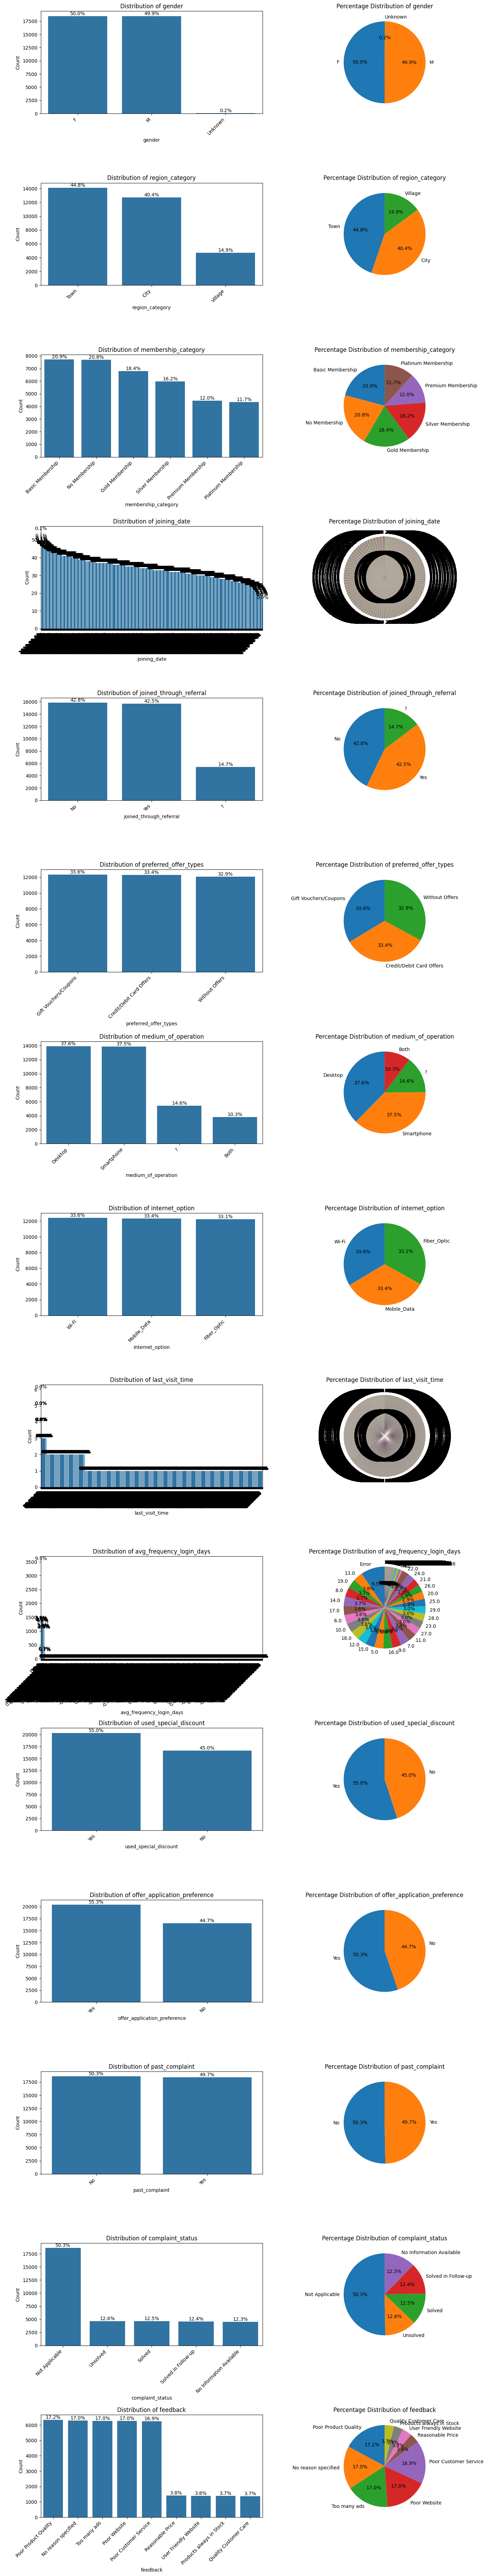


High Cardinality Columns Analysis:
--------------------------------------------------

joining_date:
Number of unique values: 1096
Top 10 most frequent values:
joining_date
2015-06-02    55
2015-07-04    51
2015-06-21    50
2015-06-26    49
2016-08-03    49
2017-03-19    48
2017-02-25    48
2017-10-28    48
2015-01-15    47
2016-09-24    47
Name: count, dtype: int64

last_visit_time:
Number of unique values: 30101
Top 10 most frequent values:
last_visit_time
07:56:41    6
17:11:53    5
22:31:06    5
02:50:54    5
12:30:02    5
21:12:56    5
06:13:12    4
14:37:29    4
16:41:45    4
17:53:05    4
Name: count, dtype: int64

avg_frequency_login_days:
Number of unique values: 1654
Top 10 most frequent values:
avg_frequency_login_days
Error    3522
13.0     1394
19.0     1365
8.0      1361
14.0     1355
17.0     1349
6.0      1336
10.0     1334
18.0     1331
12.0     1327
Name: count, dtype: int64


In [ ]:
analyze_non_numeric_distributions(filtered_data_train)

# **Observations**

1. Data Quality:
- Class Imbalance: Churn risk scores (1-5) are imbalanced, with higher concentrations in scores 3-5. This suggests need for balancing techniques in modeling
- Missing/Null Values: Appears minimal as distributions are clean
Complaint status and feedback categories show complete data

- Categorical Variables Distribution:

  - Gender: Fairly balanced binary distribution
  - Region: Three categories with uneven distribution
  - Membership: Six categories with varying distributions
  - Internet options: Three fairly balanced categories
  - Medium of operation: Four categories with uneven distribution

2. Feature Engineering Decisions:
   - Engagement Score
   - Complaint Ratio
   - Membership Value
   

3. Preprocessing Decisions:
   - Categorical Encoding:

# 4. Feature Engineering

In [ ]:

# Apply feature engineering
train_data_processed = engineer_features(filtered_data_train)
test_data_processed = engineer_features(filtered_data_test)


In [ ]:

print(f"original train data shape: {train_data.shape}")
print(f"filtered_columns_train data shape: {filtered_data_train.shape}")
print(f"train_data_processed data train data shape: {train_data_processed.shape}")
print(train_data_processed.columns.tolist())

print(f"original test data shape: {test_data.shape}")
print(f"filtered_columns_test data shape: {filtered_data_test.shape}")
print(f"test_data_processed data train data shape: {test_data_processed.shape}")
print(test_data_processed.columns.tolist())


original train data shape: (36992, 25)
filtered_columns_train data shape: (36992, 21)
train_data_processed data train data shape: (36992, 25)
['age', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score', 'engagement_score', 'complaint_resolution_rate', 'membership_value', 'activity_level']
original test data shape: (19919, 24)
filtered_columns_test data shape: (19919, 20)
test_data_processed data train data shape: (19919, 24)
['age', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'days_since

# 5. Data Preprocessing
* Handles missing values
* Scales numerical features
* Encodes categorical variables

In [ ]:

# For training data:
train_processed, fitted_transformers = preprocess_data(train_data_processed, is_training=True)
train_columns = train_processed.columns.tolist()

# Save columns for later use
np.save('train_columns.npy', train_columns)

# For test/validation data (using same transformations):
test_processed, _ = preprocess_data(test_data_processed, is_training=False, fitted_transformers=fitted_transformers)
train_columns = np.load('train_columns.npy')

# Align test columns with train columns
for col in train_columns:
    if col not in test_processed.columns:
        test_processed[col] = 0
test_processed = test_processed[train_columns]

# Print summary of preprocessing
print("\nPreprocessing Summary:")
print(f"Original train shape: {train_data.shape}")
print(f"Processed train shape: {train_processed.shape}")
print(f"Original test shape: {test_data.shape}")
print(f"Processed test shape: {test_processed.shape}")

# Print feature names to verify
print("\nFeatures after preprocessing:")
print(train_processed.columns.tolist())


Preprocessing Summary:
Original train shape: (36992, 25)
Processed train shape: (36992, 1691)
Original test shape: (19919, 24)
Processed test shape: (19919, 1691)

Features after preprocessing:
['age', 'membership_category', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'complaint_status', 'engagement_score', 'complaint_resolution_rate', 'membership_value', 'activity_level', 'days_since_joining', 'days_since_last_visit', 'gender_M', 'gender_Unknown', 'region_category_Town', 'region_category_Village', 'joined_through_referral_No', 'joined_through_referral_Yes', 'preferred_offer_types_Gift Vouchers/Coupons', 'preferred_offer_types_Without Offers', 'medium_of_operation_Both', 'medium_of_operation_Desktop', 'medium_of_operation_Smartphone', 'internet_option_Mobile_Data', 'internet_option_Wi-Fi', 'avg_frequency_login_days_-0.04739266802603481', 'avg_frequency_login_days_-0.09174297529623487', 'avg_frequency_login_days_-0.19847956265778777', 'avg_fr

In [ ]:
print(f"train processed: {train_processed.columns.tolist()}")
print(f"test processed: {test_processed.columns.tolist()}")


train processed: ['age', 'membership_category', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'complaint_status', 'engagement_score', 'complaint_resolution_rate', 'membership_value', 'activity_level', 'days_since_joining', 'days_since_last_visit', 'gender_M', 'gender_Unknown', 'region_category_Town', 'region_category_Village', 'joined_through_referral_No', 'joined_through_referral_Yes', 'preferred_offer_types_Gift Vouchers/Coupons', 'preferred_offer_types_Without Offers', 'medium_of_operation_Both', 'medium_of_operation_Desktop', 'medium_of_operation_Smartphone', 'internet_option_Mobile_Data', 'internet_option_Wi-Fi', 'avg_frequency_login_days_-0.04739266802603481', 'avg_frequency_login_days_-0.09174297529623487', 'avg_frequency_login_days_-0.19847956265778777', 'avg_frequency_login_days_-0.2228234002459999', 'avg_frequency_login_days_-0.251861234777504', 'avg_frequency_login_days_-0.2665941798278837', 'avg_frequency_login_days_-0.2903921040716

In [ ]:
# Prepare  data (after preprocessing)
X = train_processed.drop('churn_risk_score', axis=1)
y = train_processed['churn_risk_score']
XT = test_processed.drop('churn_risk_score', axis=1)
yt = test_processed['churn_risk_score']
# Assuming 'y' is your target variable Series
y = y.replace(-1, 0)  # Replace -1 with 0 in the target variable


Training and evaluating individual models...

Training xgboost...

Training lightgbm...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1487
[LightGBM] [Info] Number of data points in the train set: 36992, number of used features: 66
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791760
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

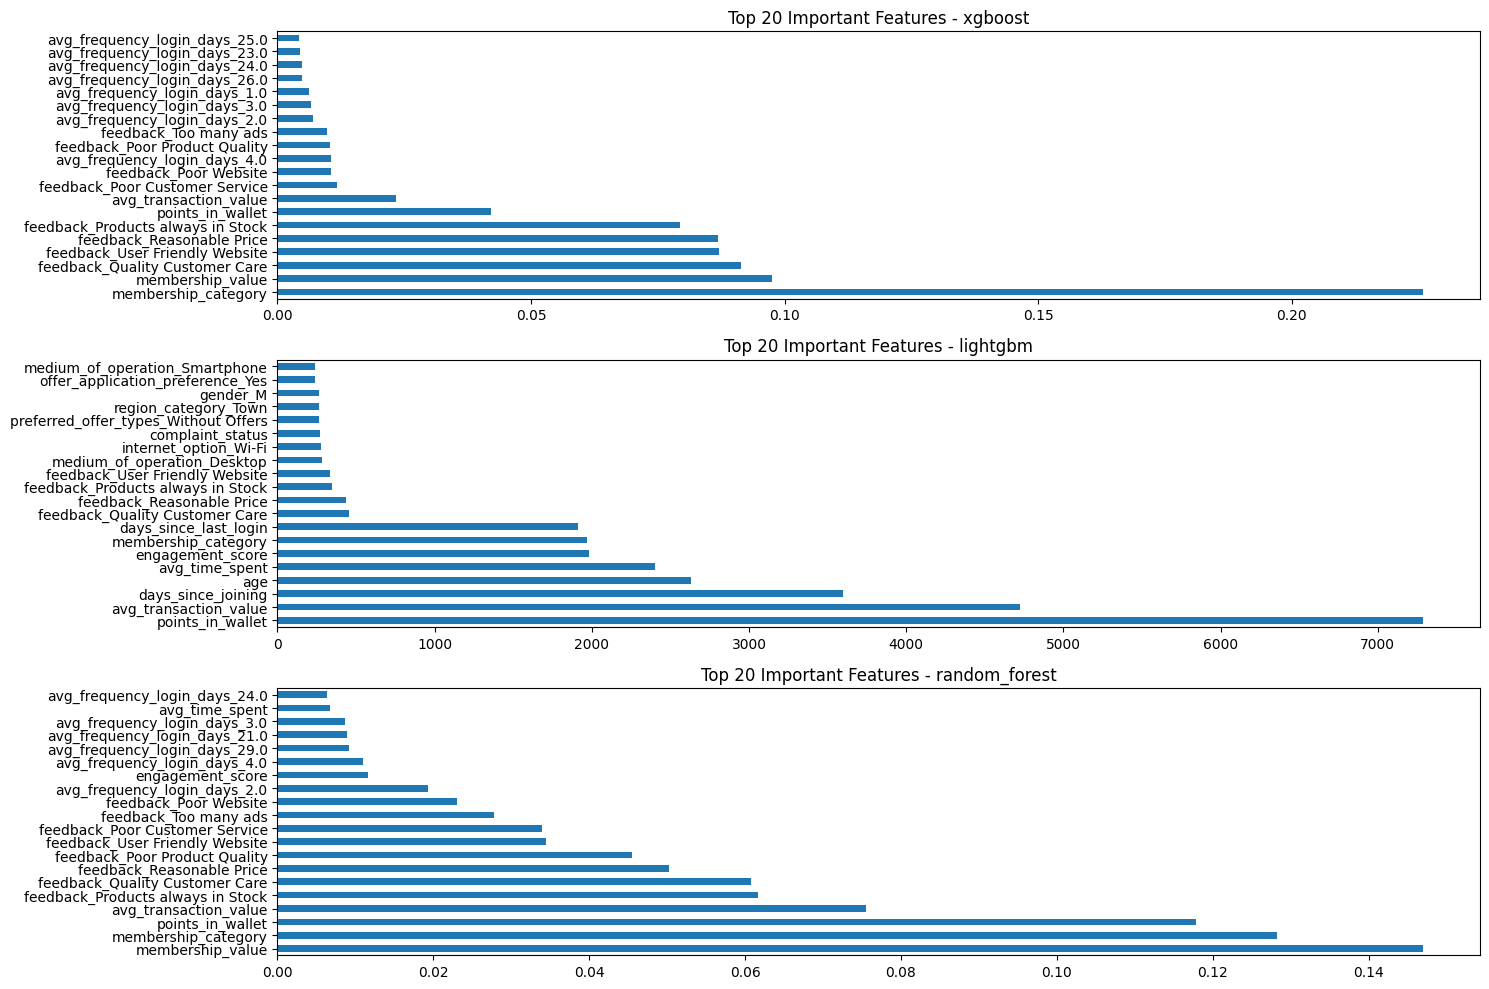

In [ ]:
# Run the complete pipeline
results, feature_importance, ensemble = run_model_pipeline(X, y)



## Tune hyper parameters

In [ ]:
#  Tune XGBoost hyperparameters
best_xgb_params = tune_xgboost(X, y)
print("\nBest XGBoost parameters:")
print(best_xgb_params)


Best XGBoost parameters:
{'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [ ]:
# Tune lightgbm hyperparameters
best_lgb_params = tune_lightgbm(X, y)
print("\nBest lightgbm parameters:")
print(best_lgb_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1487
[LightGBM] [Info] Number of data points in the train set: 36992, number of used features: 66
[LightGBM] [Info] Start training from score -3.459699
[LightGBM] [Info] Start training from score -2.635388
[LightGBM] [Info] Start training from score -2.602379
[LightGBM] [Info] Start training from score -1.266591
[LightGBM] [Info] Start training from score -1.289786
[LightGBM] [Info] Start training from score -1.325568
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin


## Model Development and optimisation
### Create optimized models:

In [ ]:
optimized_models = {
    'xgboost': xgb.XGBClassifier(**best_xgb_params),
    'lightgbm': lgb.LGBMClassifier(**best_lgb_params)
}

### Create ensemble:

In [ ]:
final_ensemble = create_optimized_ensemble(optimized_models, X, y)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

### Evaluate and visualize:

In [ ]:
# Fit models
for name, model in optimized_models.items():
    model.fit(X, y)

# Fit ensemble
final_ensemble.fit(X, y)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

VotingClassifier(estimators=[('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('lightgbm',
                              LGBMClassifier(colsample_bytree=0.7541666010159664,
                                             learning_rate=0.014789875666064259,
                                             max_depth=4, n_estimators=439,
                                             num_leaves=79,
                                             subsample=0.6488152939379115))],
                 voting='soft',
                 weights=[0.4983995370638467, 0.5016004629361533])

In [ ]:
train_processed.to_csv('processed_train.csv', index=False)

In [ ]:
from google.colab import files
files.download('processed_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_processed.to_csv('processed_test.csv', index=False)

In [ ]:
from google.colab import files
files.download('processed_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# # drop churn_risk_score from test_processed
# if 'churn_risk_score' in test_processed.columns:
#     test_processed = test_processed.drop('churn_risk_score', axis=1)


# # Prepare your data (after preprocessing)
# XT = test_processed
# yt = test_processed['churn_risk_score']



In [ ]:
# # Align test data with training features
# XT = XT[X.columns]

In [ ]:
predictions = {name: model.predict(XT) for name, model in optimized_models.items()}


In [ ]:
predictions['ensemble'] = final_ensemble.predict(XT)

In [ ]:
# # Get predictions
# predictions = {name: model.predict(test_data) for name, model in optimized_models.items()}
# predictions['ensemble'] = final_ensemble.predict(test_data)



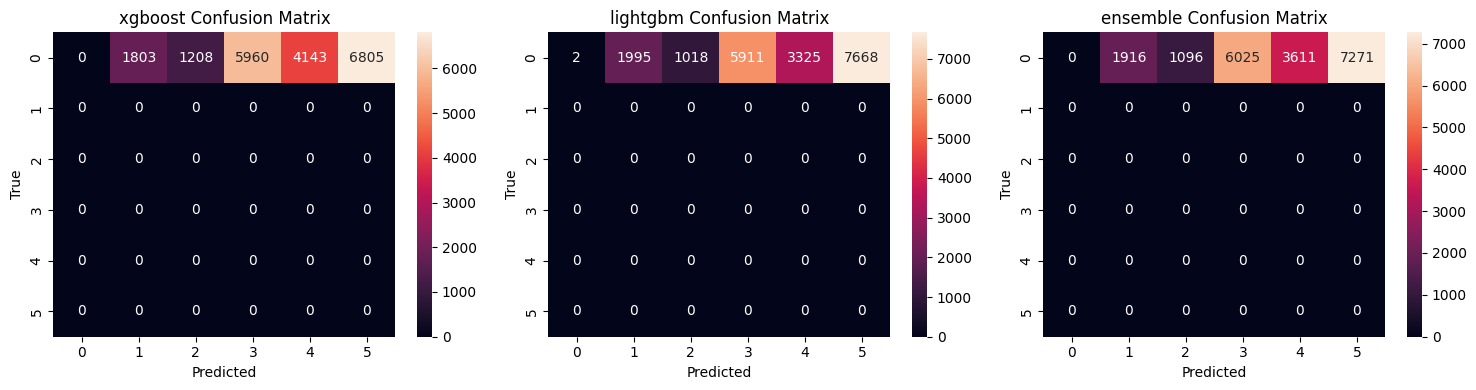

In [ ]:
# Plot metrics
plot_confusion_matrices(yt, predictions)


In [ ]:
reports = print_classification_reports(yt, predictions)
metrics_comparison = compare_model_metrics(reports)


xgboost Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00   19919.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0

    accuracy                           0.00   19919.0
   macro avg       0.00      0.00      0.00   19919.0
weighted avg       0.00      0.00      0.00   19919.0


lightgbm Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     19919
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy

# 6. Save Processed Data
# Save the processed datasets

In [ ]:
print("Target variable unique values:")
print(y.unique())
print("\nTest target variable unique values:")
print(yt.unique())

Target variable unique values:
[2 1 5 3 4 0]

Test target variable unique values:
[0]


In [ ]:


test_processed.to_csv('processed_test.csv', index=False)

In [ ]:
print(predictions)

{'xgboost': array([3, 3, 3, ..., 5, 4, 3]), 'lightgbm': array([3, 3, 3, ..., 5, 4, 3]), 'ensemble': array([3, 3, 3, ..., 5, 4, 3])}


In [ ]:
# 7. Correlation Analysis
plt.figure(figsize=(12, 8))

# Select only numerical features for correlation analysis
numerical_features = train_processed.select_dtypes(include=['number']).columns
sns.heatmap(train_processed[numerical_features].corr(), annot=True, cmap='coolwarm')


plt.title('Feature Correlation Matrix')
plt.show()



# Churn Rate Model

This secrion implementation includes:

**Model Selection:**
- XGBoost: Handles imbalanced data well through scale_pos_weight
- LightGBM: Built-in handling of class weights
- Random Forest: Uses balanced class weights
- Ensemble: Combines predictions from all models


**Cross-Validation:**
- Uses StratifiedKFold to maintain class distribution
- Implements multiple scoring metrics
- Returns both training and test scores


**Metrics:**
- Weighted F1-score: Accounts for class imbalance
- Balanced accuracy: Adjusts for class distribution
- Per-class precision and recall
- Confusion matrix analysis


**Feature Importance:**
- Extracts and visualizes important features from each model
- Helps in feature selection and understanding model decisions


**Ensemble Method:**
- Voting classifier combining multiple models
- Can use either hard or soft voting


Hyperparameter Tuning:
- Includes function for XGBoost tuning
- Uses RandomizedSearchCV for efficiency


## Final Notes and Observations:

1. Data Quality:
- Class Imbalance: Churn risk scores (1-5) are imbalanced, with higher concentrations in scores 3-5. This suggests need for balancing techniques in modeling
- Missing/Null Values: Appears minimal as distributions are clean
Complaint status and feedback categories show complete data

- Categorical Variables Distribution:

  - Gender: Fairly balanced binary distribution
  - Region: Three categories with uneven distribution
  - Membership: Six categories with varying distributions
  - Internet options: Three fairly balanced categories
  - Medium of operation: Four categories with uneven distribution

2. Feature Engineering Decisions:
   - Engagement Score
   - Complaint Ratio
   - Membership Value
   

3. Preprocessing Decisions:
   - Categorical Encoding:


4. Next Steps:
   - Model Preparation:
    - Additional Analysis Needed:
    - Correlation analysis between numerical features
    - Feature importance analysis
    - Interaction effects between features
    - Time-based patterns in customer behavior


  - Model Considerations:
    - Use models that handle class imbalance well (XGBoost, LightGBM)
    - Implement cross-validation with stratification
    - Consider ensemble methods
    - Focus on metrics like weighted F1-score or balanced accuracy
   